# Implementando un modelo de regresión lineal

La finalidad de este ejercicio es encontrar la línea recta que mejor se ajuste a los datos suministrados.

Datos para el desarrollo del problema:

### Hipótesis:  $h_w = w_0 + w_1x$
La hipótesis es la curva que busca representar los datos, como se trata de una regresión lineal, la curva corresponde a una recta de la forma $y = mx + b$.
### Parametros: $w_0, w_1$
Los parámetros son los valores que modifican la curva, en este caso corresponden a la pendiente de la recta y su punto de corte con el eje $y$.
### Función de pérdida: $J(w_0, w_1) = \frac{1}{2m}\sum_{i=1}^{m}(h_w(x^{(i)})-y^{(i)})^2$
La función que determina cual es el error del modelo, corresponde a la **mitad del error cuadrático medio**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets._samples_generator import make_regression

In [28]:
X, y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)
df = pd.read_csv("data.csv", header=None)
df = df.to_numpy()
#X = [df[:,0]]
#y = [df[:,1]]
print(X)
print("aaaaaaaaaaaaaaaaaaaaa")
print(df[...,0])
print(X.size)
print(df[...,0].size)


m = 100

[[-0.05358755]
 [ 0.81490518]
 [ 1.15805552]
 [-0.75361164]
 [ 1.92273803]
 [ 1.22923449]
 [-0.25665373]
 [-0.3916012 ]
 [-0.13390765]
 [ 1.31594368]
 [ 0.75272929]
 [-0.43224009]
 [-0.66643198]
 [ 0.82272281]
 [-1.86451829]
 [-1.52007408]
 [ 0.62675835]
 [ 1.84213516]
 [-1.0844555 ]
 [ 2.18609495]
 [-0.07992433]
 [-0.35957085]
 [-0.27289366]
 [ 2.21796653]
 [ 0.73690722]
 [-0.95172629]
 [ 1.19279792]
 [ 0.19991277]
 [ 0.32154286]
 [-0.22134672]
 [-0.19478459]
 [-0.84640754]
 [-0.01471103]
 [-0.8677184 ]
 [ 0.76579565]
 [-0.11879521]
 [-1.00900322]
 [-0.1968985 ]
 [ 0.59205971]
 [ 0.52423795]
 [ 1.21498404]
 [ 0.52045974]
 [ 0.21215972]
 [ 0.72311791]
 [-0.2327679 ]
 [-0.63968302]
 [-1.95027664]
 [ 0.55642577]
 [-0.41238072]
 [-0.11856477]
 [-0.29594898]
 [ 0.52518578]
 [ 0.49022774]
 [ 0.2630036 ]
 [-1.74434015]
 [-0.21495011]
 [ 0.21348149]
 [ 0.60437586]
 [ 0.2584544 ]
 [ 0.47725678]
 [-0.33175226]
 [-0.33215113]
 [-1.11952533]
 [-0.13055295]
 [-0.14479561]
 [-0.24249065]
 [ 0.02045

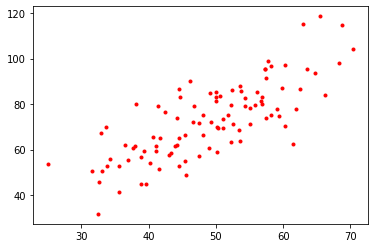

In [3]:
plt.scatter(X, y, c="red", marker=".")

In [4]:
def h(X, w):
    return (w[1] * np.array(X[:, 0]) + w[0])

In [5]:
def cost(w, X, y):
    return (.5 / m) * np.sum(np.square(h(X, w) - np.array(y)))

In [6]:
def grad(w, X, y):
    g = [0] * 2
    g[0] = (1 / m) * np.sum(h(X, w) - np.array(y))
    g[1] = (1 / m) * np.sum((h(X, w) - np.array(y)) * np.array(X[:, 0]))
    return g

In [7]:
def descent(w_new, w_prev, lr):
    print('initial w = ', w_prev)
    print('initial cost = ', cost(w_prev, X, y))
    print('\nLearning process')
    j = 0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr * grad(w_prev, X, y)[0]
        w1 = w_prev[1] - lr * grad(w_prev, X, y)[1]
        w_new = [w0, w1]
        print('w = ', w_new)
        print('cost = ', cost(w_new, X, y))
        if (w_new[0] - w_prev[0]) ** 2 + (w_new[1] - w_prev[1]) ** 2 <= pow(10, -6):
            return w_new
        if j > 500:
            return w_new
        j += 1


In [8]:
w = [5, -3]

w = descent(w, w, .1)
print('\nfinal w = ', w)
print('final cost = ', cost(w, X, y))

initial w =  [5, -3]


TypeError: list indices must be integers or slices, not tuple

In [ ]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)


def my_formula(x):
    return w[1] * x + w[0]

In [ ]:
plt.scatter(X, y, c="red", marker=".")
graph(my_formula, range(-3, 4))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()